<a href="https://colab.research.google.com/github/bellottisofia/Innovation_Adoption_Parameters/blob/main/matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
#import file excel
df = pd.read_excel('/content/dataset_clean.xlsx')

In [ ]:
# create a dictionar with the km mapping

km_map = {
     "I don't know":np.nan,
    'Less than 1.000 km': 'less than 4.999',
     '1.000-4.9999':'less than 4.999',
    '5.000-9.999': '5.000-9.999'  ,
    '10.000-19.999':'10.000-19.999',
    '20.000-29.999': '20.000-29.999' ,

     '30.000-39.999' : 'more than 30.000',


    '40.000-49.999' :'more than 30.000' ,
     '50.000 or more' : 'more than 30.000',
}






In [ ]:
# create a new colummn 'km_year'
df['km_year'] = df['Q7'].map(km_map)
#drop column 'Q7' (column that contained the annual km)
df.drop(columns=['Q7'], inplace=True)
#drop null values
df.dropna(inplace=True)

In [ ]:
# visualize columns values
for col in df.columns:
    print(f"Column '{col}': {df[col].unique()}")

Column 'Q11_1': [1 0]
Column 'Q11_2': [0 1]
Column 'Q11_3': [0 1]
Column 'Q11_4': [1 0]
Column 'Q11_5': [0 1]
Column 'Q11_6': [0 1]
Column 'Q11_7': [1 0]
Column 'Q11_8': [0 1]
Column 'Q11_9': [0 1]
Column 'Q11_10': [1 0]
Column 'Q11_11': [0 1]
Column 'Q11_12': [0 1]
Column 'Q11_13': [0 1]
Column 'Q12_1': [0 1]
Column 'Q12_2': [0 1]
Column 'Q12_3': [1 0]
Column 'Q12_4': [1 0]
Column 'Q12_5': [0 1]
Column 'Q12_6': [0 1]
Column 'Q12_7': [0 1]
Column 'Q12_8': [0 1]
Column 'Q12_9': [0 1]
Column 'Q12_10': [1 0]
Column 'Q12_11': [0 1]
Column 'Q12_12': [0 1]
Column 'Q12_13': [0 1]
Column 'Q12_14': [0 1]
Column 'Q13_1': [0 1]
Column 'Q13_2': [0 1]
Column 'Q13_3': [0 1]
Column 'Q13_4': [0 1]
Column 'Q13_5': [1 0]
Column 'Q13_6': [1 0]
Column 'Q13_7': [0 1]
Column 'Q13_8': [0 1]
Column 'Q13_9': [1 0]
Column 'Q13_10': [0 1]
Column 'Q13_11': [1 0]
Column 'Q13_12': [0 1]
Column 'Q13_13': [0 1]
Column 'Q13_14': [0 1]
Column 'Q13_15': [0 1]
Column 'Q16': [99999997        1        2        3]
Column 'Q

Responses such as 'Don't Know' or 'Neither/nor' were initially coded with very high numerical values, which could potentially distort the analysis. To mitigate this effect, these responses were recoded as neutral answers, assigning them a value of 3 (`Neutral').

In [ ]:
df.replace(99999997, 3, inplace=True)

In [ ]:
for col in df.columns:
    print(f"Column '{col}': {df[col].unique()}")

Column 'Q11_1': [1 0]
Column 'Q11_2': [0 1]
Column 'Q11_3': [0 1]
Column 'Q11_4': [1 0]
Column 'Q11_5': [0 1]
Column 'Q11_6': [0 1]
Column 'Q11_7': [1 0]
Column 'Q11_8': [0 1]
Column 'Q11_9': [0 1]
Column 'Q11_10': [1 0]
Column 'Q11_11': [0 1]
Column 'Q11_12': [0 1]
Column 'Q11_13': [0 1]
Column 'Q12_1': [0 1]
Column 'Q12_2': [0 1]
Column 'Q12_3': [1 0]
Column 'Q12_4': [1 0]
Column 'Q12_5': [0 1]
Column 'Q12_6': [0 1]
Column 'Q12_7': [0 1]
Column 'Q12_8': [0 1]
Column 'Q12_9': [0 1]
Column 'Q12_10': [1 0]
Column 'Q12_11': [0 1]
Column 'Q12_12': [0 1]
Column 'Q12_13': [0 1]
Column 'Q12_14': [0 1]
Column 'Q13_1': [0 1]
Column 'Q13_2': [0 1]
Column 'Q13_3': [0 1]
Column 'Q13_4': [0 1]
Column 'Q13_5': [1 0]
Column 'Q13_6': [1 0]
Column 'Q13_7': [0 1]
Column 'Q13_8': [0 1]
Column 'Q13_9': [1 0]
Column 'Q13_10': [0 1]
Column 'Q13_11': [1 0]
Column 'Q13_12': [0 1]
Column 'Q13_13': [0 1]
Column 'Q13_14': [0 1]
Column 'Q13_15': [0 1]
Column 'Q16': [3 1 2]
Column 'Q17': [3 1 2 4 5]
Column 'Q18_1

We consider the following questions:

Q20: how your opinion about diesel and gasoline motor is changed : 1 more positive 5 more negative

Q21: how your opinion about EV is changed : 1 more positive 5 more negative

Q17: If you only had an electric car, how well would it suit your daily driving?
Very good 1 to Very bad 5







To ensure consistency in data interpretation, we standardize the response scales such that a value of 5 always corresponds to a favorable opinion towards electric vehicles. Consequently, we reverse the scale for questions Q17 and Q21.


In [ ]:
df['Q17'] = 5- df['Q17']
df['Q21'] = 5- df['Q21']

In [ ]:
#construct a Germany dataset
df_Germany=df.loc[df['Country']=='Germany']

In [ ]:
# Define a custom order for the 'km_year' categories (kilometers driven per year)
order_km = ['less than 4.999',
            '5.000-9.999',
            '10.000-19.999',
            '20.000-29.999',
            'more than 30.000']

# Convert the 'km_year' column in df_Germany to an ordered categorical variable
# to ensure that the categories follow the specified logical order (useful in the following plot)
df_Germany['km_year'] = pd.Categorical(df_Germany['km_year'], categories=order_km, ordered=True)


<ipython-input-35-3caa1ddaa4f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['km_year'] = pd.Categorical(country['km_year'], categories=order_km, ordered=True)


<ipython-input-42-f45768e86266>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_Germany = df_Germany.groupby(['Lftcat', 'km_year']).size().unstack(fill_value=0)
<ipython-input-42-f45768e86266>:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


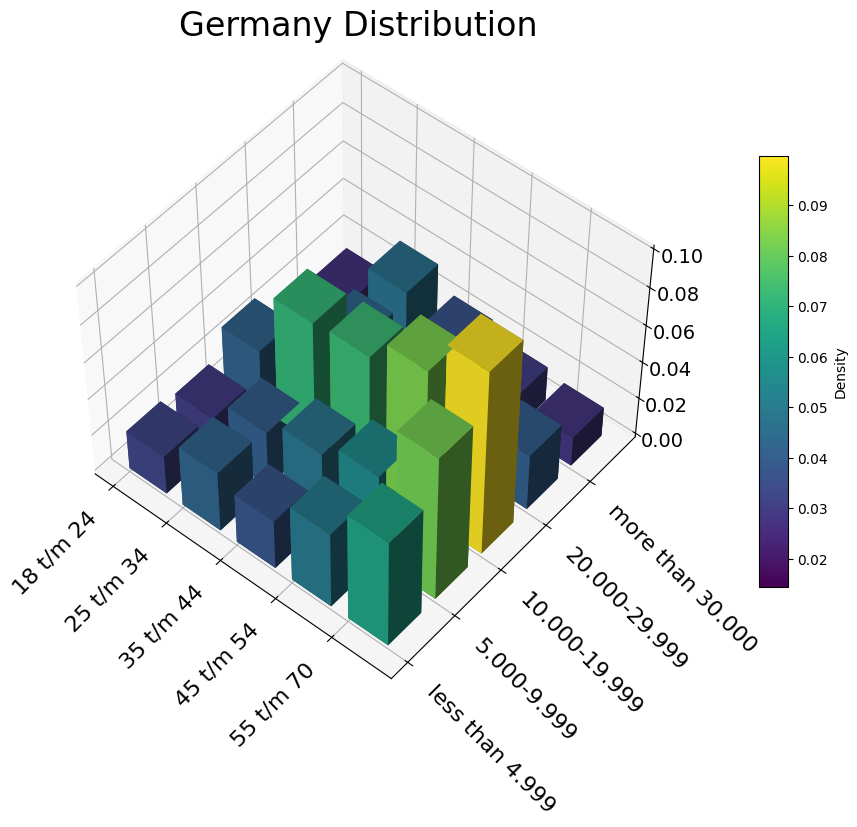

In [ ]:
# Group the data by 'Lftcat' ('age group' category) and 'km_year'
#count the occurrences in each group.
#Unstack to create a matrix format.
grouped_matrix_Germany = df_Germany.groupby(['Lftcat', 'km_year']).size().unstack(fill_value=0)

# Normalize the matrix to get density
Z = grouped_matrix_Germany.values.astype(float)
Z = Z / Z.sum()

# Create grid positions for the 3D bars
xpos, ypos = np.meshgrid(np.arange(Z.shape[0]), np.arange(Z.shape[1]), indexing="xy")
xpos = xpos.ravel()  # Flatten for plotting
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)  # Base of bars starts at z = 0

# Height of the bars corresponds to normalized density values
dz = Z.T.ravel()  # Transpose so y-axis matches columns (km_year)

# Color mapping using the Viridis colormap, scaled by max value
colors = cm.viridis(dz / dz.max())

# Set up the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=50, azim=-50)  # viewing angle

# Draw the 3D bars
ax.bar3d(xpos, ypos, zpos, dx=0.7, dy=0.7, dz=dz, color=colors, zsort='average')

# Set x-axis tick positions and labels (Lftcat categories)
ax.set_xticks(np.arange(Z.shape[0]))
ax.set_xticklabels(grouped_matrix_Germany.index, rotation=45, ha='right', fontsize=16)

# Set y-axis tick positions and labels (km_year categories)
ax.set_yticks(np.arange(Z.shape[1]))
ax.set_yticklabels(grouped_matrix_Germany.columns, rotation=-45, ha='left', fontsize=16)

# Adjust z-axis tick label size
ax.tick_params(axis='z', labelsize=14)

# Add a plot title
ax.set_title("Germany Distribution", fontsize=24, pad=20)

# Add a color bar to indicate density scale
mappable = cm.ScalarMappable(cmap='viridis')
mappable.set_array(dz)
fig.colorbar(mappable, ax=ax, shrink=0.7, aspect=15, pad=0.1, label='Density')

# show plot
plt.tight_layout()
plt.show()


In [ ]:
# Group the data by 'Lftcat' ('age group' category) and 'km_year'
#count the occurrences in each group, divide by number of people in the Germany dataset to get density
grouped_fractions_Germany = df_Germany.groupby(['Lftcat', 'km_year']).size() / len(df_Germany)
#show density
grouped_fractions_Germany

<ipython-input-43-98a3d9592b88>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_fractions_Germany = df_Germany.groupby(['Lftcat', 'km_year']).size() / len(df_Germany)


Lftcat     km_year         
18 t/m 24  less than 4.999     0.020969
           5.000-9.999         0.018077
           10.000-19.999       0.031815
           20.000-29.999       0.014461
           more than 30.000    0.015184
25 t/m 34  less than 4.999     0.032538
           5.000-9.999         0.030369
           10.000-19.999       0.066522
           20.000-29.999       0.033261
           more than 30.000    0.037599
35 t/m 44  less than 4.999     0.026753
           5.000-9.999         0.039046
           10.000-19.999       0.067968
           20.000-29.999       0.026753
           more than 30.000    0.026030
45 t/m 54  less than 4.999     0.041215
           5.000-9.999         0.047722
           10.000-19.999       0.080260
           20.000-29.999       0.041215
           more than 30.000    0.018800
55 t/m 70  less than 4.999     0.058568
           5.000-9.999         0.078814
           10.000-19.999       0.099783
           20.000-29.999       0.030369
           more than 30.000    0.015907
dtype: float64

In [ ]:
# Select columns whose names start with question prefixes ('Q11_', 'Q12_', 'Q13_', 'Q17', 'Q18_', 'Q20', 'Q21') --> important questions to be averaged

columns_to_average = [col for col in df_Germany.columns
                      if col.startswith(('Q11_', 'Q12_', 'Q13_', 'Q17', 'Q18_', 'Q20', 'Q21'))]

# Group the DataFrame by 'Lftcat' and 'km_year' and compute the mean of the selected columns
grouped_matrix_Germany = df_Germany.groupby(['Lftcat', 'km_year'])[columns_to_average].mean()

# Create a new identifier by combining 'Lftcat' and 'km_year' for each group called 'population'
grouped_matrix_Germany['population'] = (
    grouped_matrix_Germany.index.get_level_values('Lftcat') + '_' +
    grouped_matrix_Germany.index.get_level_values('km_year').astype(str)
)

# Reset index to turn the group labels into columns, and re-order to place 'population' first
matrix_Germany = grouped_matrix_Germany.reset_index(drop=True)
matrix_Germany = matrix_Germany[['population'] + [col for col in matrix_Germany.columns if col != 'population']]


<ipython-input-44-a2dc90014abe>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_Germany = df_Germany.groupby(['Lftcat', 'km_year'])[columns_to_average].mean()


In [ ]:
# Rescale selected columns to a 0–1 range
for column in columns_to_rescale:
    matrix_Germany[column] = (matrix_Germany[column] - 1) / 4

# Save the resulting DataFrame to a CSV file (without the index column)
matrix_Germany.to_csv("matrix_Germany.csv", index=False)
